# Analysis of Dutch Election Polls #TK2021
*Source: Wikipedia*

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from highlight_text import fig_text
import custom_theme

## Data processing

In [3]:
results = pd.read_html('https://en.wikipedia.org/wiki/2021_Dutch_general_election')[3]
results = (results.filter(['Party', 'Current seats'])
                  .rename(columns={'Party': 'Partij', 'Current seats': 'Verkiezingen'})
                  .set_index('Partij')
                  .rename(index={'FvD': 'FVD', 'DENK': 'Denk'}))
results

""
Partij
VVD
PVV
CDA
D66
GL
SP
PvdA
CU
PvdD


In [4]:
# Preliminary results
results = pd.read_csv('preliminary_results.csv', index_col='Partij')
results.sum()

Verkiezingen    150
dtype: int64

In [5]:
polls

,Peilingsorganisatie,Datum,VVD,D66,PvdA,GL,PVV,CDA,SP,FVD,...,JA21,SGP,DENK,50PLUS,BBB,BIJ1,BVNL,NSC,Overig,Refs
0,Ipsos: exitpoll 21.00 uur,22 november 2023,23,10,26,26,35,5,5,3,...,1,3,2,1,7,0,0,20,0,[1]
1,Peil.nl,21 november 2023,26,8,28,28,29,6,5,4,...,1,2,4,0,6,1,1,19,0,[2]
2,Ipsos,21 november 2023,29,11,24,24,27,4,5,3,...,1,3,4,0,6,1,0,19,0,[3]
3,I&O Research,21 november 2023,27,9,27,27,28,4,6,4,...,1,3,3,0,5,0,1,21,0,[4]
4,I&O Research,20 november 2023,27,8,27,27,26,4,6,4,...,2,3,3,0,6,0,1,21,0,[5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,I&O Research,16 april 2021,34,26,8,6,15,14,10,7,...,6,3,3,1,1,1,–,–,0,[168]
170,Peil.nl,11 april 2021,31,24,9,7,16,14,9,9,...,5,3,3,1,2,1,–,–,0,[169]
171,Peil.nl,4 april 2021,28,25,9,8,16,15,9,9,...,5,3,3,1,2,1,–,–,0,[170]
172,Peil.nl,28 maart 2021,33,24,9,7,16,14,9,9,...,5,3,3,1,1,1,–,–,0,[171]


In [10]:
(polls.head(10)
         .assign(
             Peilingsorganisatie=lambda x: x['Peilingsorganisatie'].replace(r'\[\d\]', '', regex=True).str.strip(),
             Datum=lambda x: (x['Datum']
)
             ))

,Peilingsorganisatie,Datum,VVD,D66,PvdA,GL,PVV,CDA,SP,FVD,...,JA21,SGP,DENK,50PLUS,BBB,BIJ1,BVNL,NSC,Overig,Refs
0,Ipsos: exitpoll 21.00 uur,22 november 2023,23,10,26,26,35,5,5,3,...,1,3,2,1,7,0,0,20,0,[1]
1,Peil.nl,21 november 2023,26,8,28,28,29,6,5,4,...,1,2,4,0,6,1,1,19,0,[2]
2,Ipsos,21 november 2023,29,11,24,24,27,4,5,3,...,1,3,4,0,6,1,0,19,0,[3]
3,I&O Research,21 november 2023,27,9,27,27,28,4,6,4,...,1,3,3,0,5,0,1,21,0,[4]
4,I&O Research,20 november 2023,27,8,27,27,26,4,6,4,...,2,3,3,0,6,0,1,21,0,[5]
5,Peil.nl,18 november 2023,26,8,23,23,26,6,5,5,...,1,2,4,0,7,1,1,23,0,[6]
6,I&O Research,14 november 2023,27,7,23,23,20,4,7,4,...,1,4,4,1,8,0,1,25,0,[7]
7,Ipsos,14 november 2023,28,9,23,23,17,4,5,4,...,2,3,4,0,9,1,0,26,0,[8]
8,Peil.nl,11 november 2023,27,7,24,24,21,5,4,5,...,1,2,4,0,9,1,1,28,0,[9]
9,I&O Research,7 november 2023,26,8,24,24,18,4,6,5,...,1,3,4,0,8,0,1,29,0,[10]


In [27]:
polls

,Peilingsorganisatie,Datum,VVD,D66,PvdA,GL,PVV,CDA,SP,FVD,...,JA21,SGP,DENK,50PLUS,BBB,BIJ1,BVNL,NSC,Overig,Refs
0,Ipsos: exitpoll 21.30 uur,22 november 2023,24,10,25,25,35,5,5,3,...,1,3,3,1,7,0,0,20,0,[1]
1,Ipsos: exitpoll 21.00 uur,22 november 2023,23,10,26,26,35,5,5,3,...,1,3,2,1,7,0,0,20,0,[2]
2,Peil.nl,21 november 2023,26,8,28,28,29,6,5,4,...,1,2,4,0,6,1,1,19,0,[3]
3,Ipsos,21 november 2023,29,11,24,24,27,4,5,3,...,1,3,4,0,6,1,0,19,0,[4]
4,I&O Research,21 november 2023,27,9,27,27,28,4,6,4,...,1,3,3,0,5,0,1,21,0,[5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,I&O Research,16 april 2021,34,26,8,6,15,14,10,7,...,6,3,3,1,1,1,–,–,0,[169]
171,Peil.nl,11 april 2021,31,24,9,7,16,14,9,9,...,5,3,3,1,2,1,–,–,0,[170]
172,Peil.nl,4 april 2021,28,25,9,8,16,15,9,9,...,5,3,3,1,2,1,–,–,0,[171]
173,Peil.nl,28 maart 2021,33,24,9,7,16,14,9,9,...,5,3,3,1,1,1,–,–,0,[172]


In [58]:
polls = pd.read_html('https://nl.wikipedia.org/wiki/Tweede_Kamerverkiezingen_2023/Peilingen')[0]

# Clean DataFrame
polls = (polls
         .head(10)
         .assign(
             Peilingsorganisatie=lambda x: x['Peilingsorganisatie'].replace(r'\[\d\]', '', regex=True).str.strip(),
             Datum=lambda x: pd.to_datetime(x['Datum'])
             )
         .sort_values('Datum')
         .drop_duplicates(subset='Peilingsorganisatie', keep='last')
         .drop(columns=['Datum'])
         .set_index(['Peilingsorganisatie'])
         .transpose()
         .drop(index=['Overig', 'Refs', 'PvdA'])
         .fillna(0).astype('int')
         .drop(columns='Ipsos: exitpoll 21.00 uur')
         .rename(columns={'Ipsos: exitpoll 21.30 uur': 'Exit poll'})
         .rename(index={'GL': 'GLPVDA'})
        #  .join(results).fillna(0).astype('int')
         .sort_values('Exit poll', ascending=False))
        #  [['Verkiezingen', 'EenVandaag', 'I&O Research', 'Peil.nl', 'Kantar Public']])
polls

Peilingsorganisatie,Peil.nl,Ipsos,I&O Research,Exit poll
PVV,29,27,28,35
GLPVDA,28,24,27,25
VVD,26,29,27,24
NSC,19,19,21,20
D66,8,11,9,10
BBB,6,6,5,7
CDA,6,4,4,5
SP,5,5,6,5
FVD,4,3,4,3
PvdD,4,5,5,3


## Polling error

In [59]:
poll_names = ['Peil.nl', 'Ipsos', 'I&O Research']
errors = polls[poll_names].sub(polls['Exit poll'], axis=0)
errors

Peilingsorganisatie,Peil.nl,Ipsos,I&O Research
PVV,-6,-8,-7
GLPVDA,3,-1,2
VVD,2,5,3
NSC,-1,-1,1
D66,-2,1,-1
BBB,-1,-1,-2
CDA,1,-1,-1
SP,0,0,1
FVD,1,0,1
PvdD,1,2,2


In [60]:
errors.median(axis=1).sort_values().to_frame('Zetels verschil (mediaan)').T

,PVV,50PLUS,NSC,D66,BBB,CDA,JA21,SP,CU,SGP,Volt,DENK,FVD,BIJ1,BVNL,GLPVDA,PvdD,VVD
Zetels verschil (mediaan),-7.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0


In [61]:
np.abs(errors).sum(axis=0).sort_values().to_frame('Totaal zetelverschil').T

Peilingsorganisatie,Peil.nl,I&O Research,Ipsos
Totaal zetelverschil,24,24,26


## Visualization

In [62]:
def plot_logo(x, y, image, ax, zoom=1):
    '''Help function for plotting logos on ax'''
    image = plt.imread(image)
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

def add_value_labels(ax, fontsize):
    '''Help function for plotting value above bar'''
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        y_nudge = 1 if y_value >= 0 else -14

        ax.annotate(
            str(y_value),
            (x_value, y_value),
            xytext=(0, y_nudge),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=fontsize)

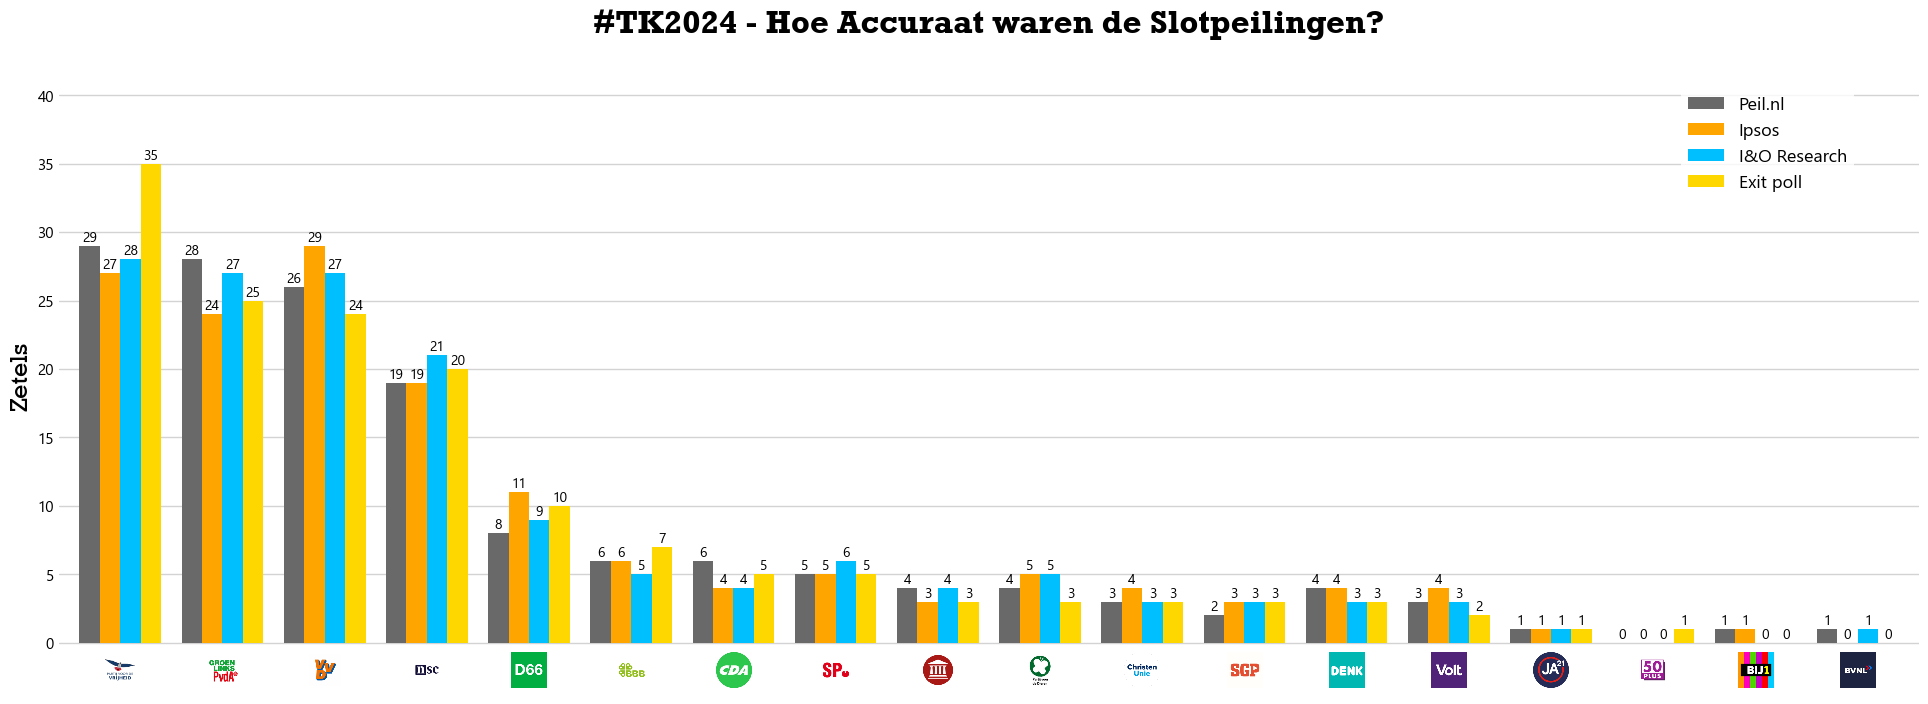

In [65]:
fig, ax = plt.subplots(figsize=(24,8))

# Bar Colors
color_list=['dimgrey', 'orange', 'deepskyblue', 'gold', 'violet']

# Plot bar plot
polls.plot.bar(width=.8, ax=ax, zorder=5, color=color_list)

# Title, labels and ticks
ax.set_title('#TK2024 - Hoe Accuraat waren de Slotpeilingen?', fontfamily='Rockwell')
ax.set_ylabel('Zetels', fontfamily='Rockwell')
plt.xticks([])
ax.tick_params(axis=u'both', which=u'both',length=0)

# Grid and legend
ax.grid(axis='y', zorder=0)
ax.legend(bbox_to_anchor=(0.97, 0.98), fontsize=13)

# Plot party logos
for pos, party in enumerate(polls.index):
    plot_logo(pos, -2, f"logos/{party.lower()}.png", ax=ax, zoom=.2)

# Add value labels above bars
add_value_labels(ax, fontsize=10)

# Limits
ax.set_ylim([-3, 42])
ax.set_xlim(-0.6, len(polls)-0.4)

# Save figure
fig.savefig('images/TK2024_polls.png', bbox_inches='tight')
fig

<ipython-input-67-28fe28c5b0e7>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(18,12), sharey=False)


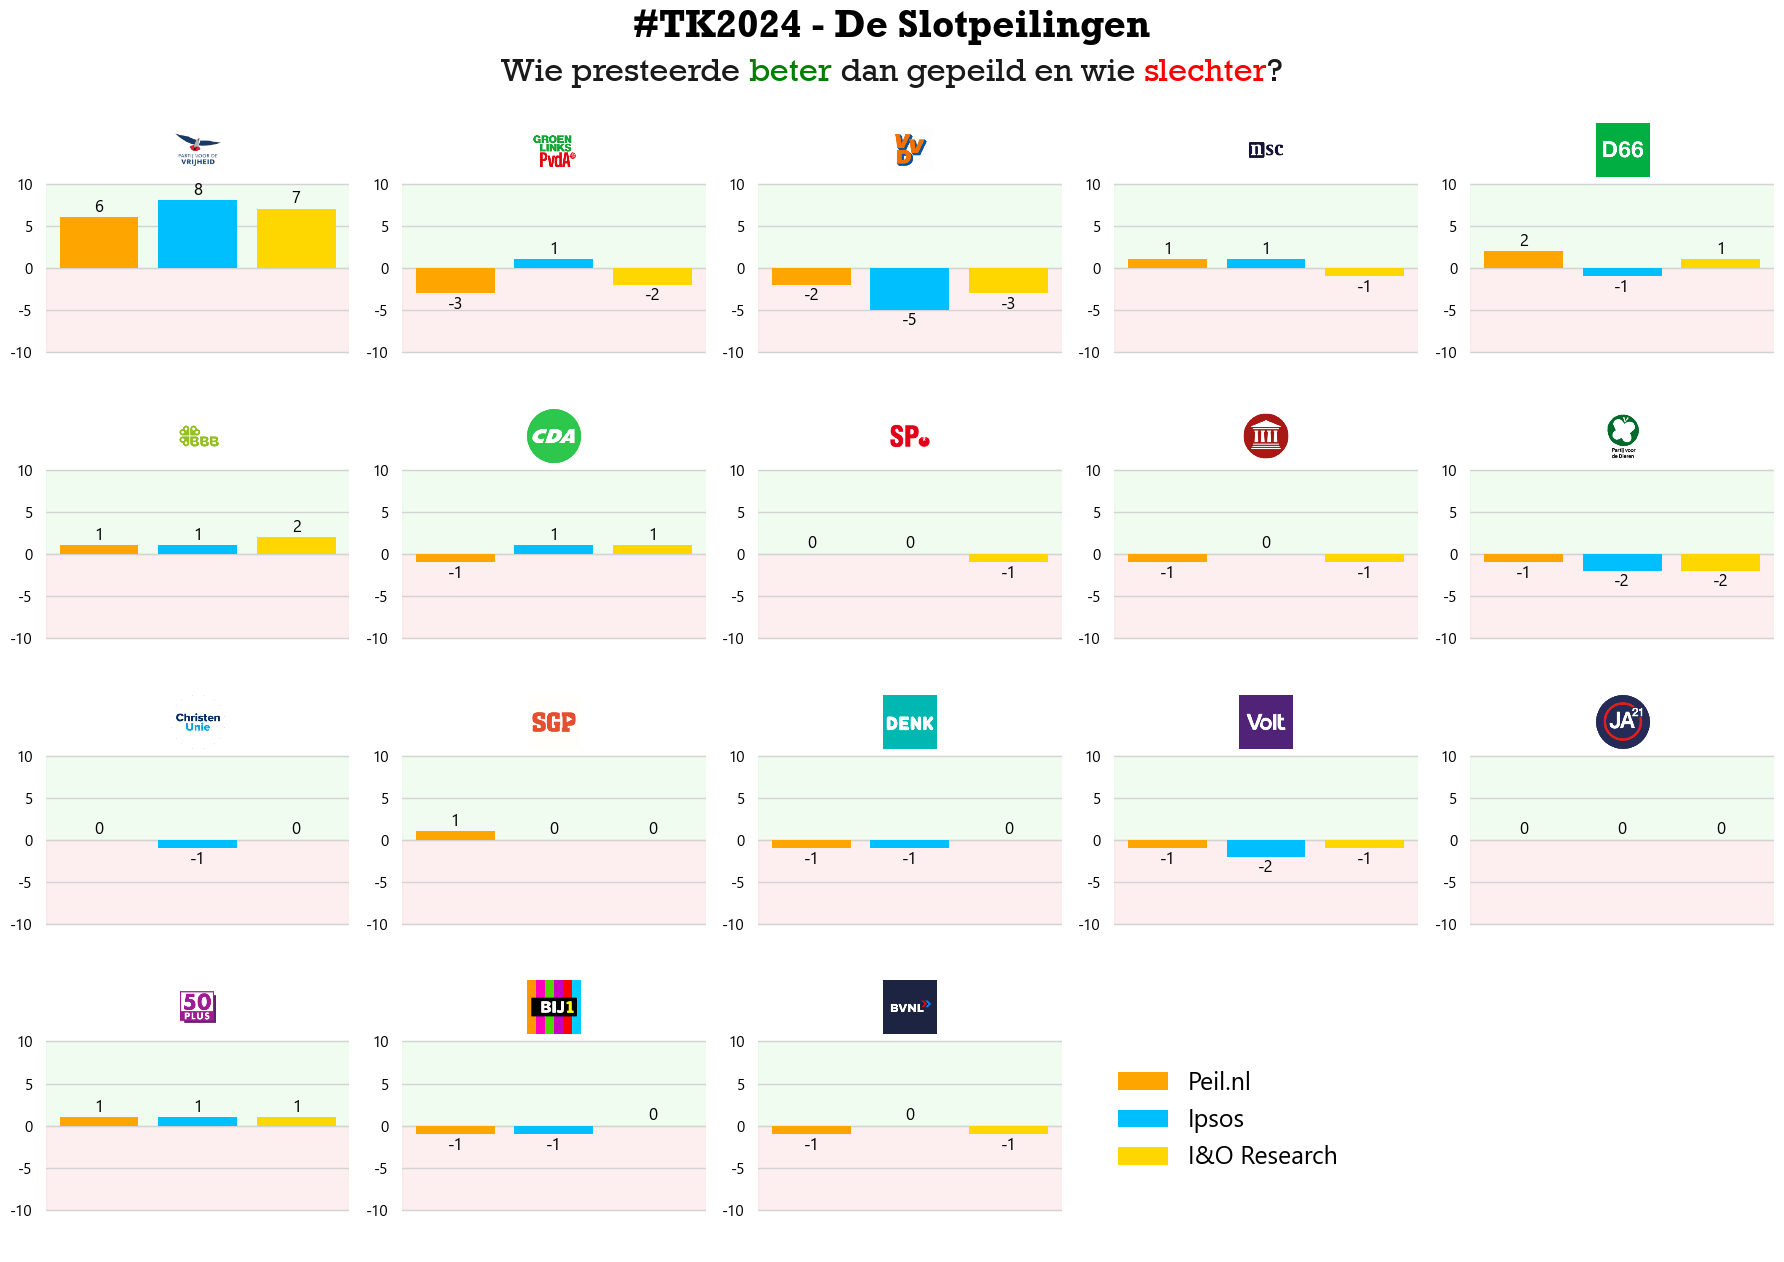

In [67]:
fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(18,12), sharey=False)

for i, ax in enumerate(axes.flatten()):
    if i > (len(polls)-1):
        ax.axis('off')
        continue

    party_error = -(errors.iloc[i])

    for x, (label, height) in enumerate(party_error.items()):
        ax.bar(x=x, height=height, color=color_list[x+1], label=label)

    # Enable horizontal grid
    ax.grid(axis='y')

    # Set ticks
    ax.set_xticks([])
    ax.set_yticks(ticks=[-10, -5, 0, 5, 10])
    ax.set_yticklabels([-10, -5, 0, 5, 10], fontsize=11)

    # Plot party logos
    plot_logo(1, 14, f"logos/{party_error.name}.png", ax=ax, zoom=.3)

    # Add value labels above bars
    add_value_labels(ax, fontsize=12)

# Titles
plt.suptitle('#TK2024 - De Slotpeilingen', y=1.05, fontsize=28, fontweight='bold', fontfamily='Rockwell')
fig_text(x=0.5, y=0.985,
        s='Wie presteerde <beter> dan gepeild en wie <slechter>?',
        color='k', highlight_colors = ['green', 'red'],  fontsize=24, fontfamily='Rockwell', ha='center')

# Green/red backgrounds
for i in range(4):
    for j in range(5):
        if j in [3, 4] and i == 3:  # empty axes
            continue
        axes[i,j].axhspan(0, 10, alpha=0.12, color='lightgreen', zorder=0)
        axes[i,j].axhspan(0, -10, alpha=0.12, color='lightcoral', zorder=0)

# Plot legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.76, 0.185), fontsize=18)

# Set limits
plt.setp(axes, ylim=(-15, 15))
fig.tight_layout(h_pad=2, w_pad=1)

# Save figure
fig.savefig('images/TK2024_polling_error.png', dpi=300, bbox_inches='tight')
fig